In [1]:
import tensorflow as tf
# import adanet
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [2]:
# Load dataset
(x_train, labels_train), (x_test, labels_test) = tf.keras.datasets.cifar10.load_data()

print(f'x_train shape: {x_train.shape}')
print(f'labels_train shape: {labels_train.shape}')
print(f'x_test  shape: {x_test.shape}')
print(f'labels_test  shape: {labels_test.shape}')

x_train shape: (50000, 32, 32, 3)
labels_train shape: (50000, 1)
x_test  shape: (10000, 32, 32, 3)
labels_test  shape: (10000, 1)


In [8]:
x_train = x_train / 255
x_test = x_test / 255

In [9]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

y_train = to_categorical(labels_train)
y_test = to_categorical(labels_test)

print(f'y_train shape: {y_train.shape}')
print(f'y_test  shape: {y_test.shape}')

y_train shape: (50000, 10)
y_test  shape: (10000, 10)


In [10]:
def show_images(rows=5, columns=5):
    """Prints a set of images."""

    for i in range(columns):
        for j in range(rows):
            index = j * columns + i + 1
            plt.subplot(rows, columns, index)
            plt.imshow(x_train[index-1])
    plt.show()

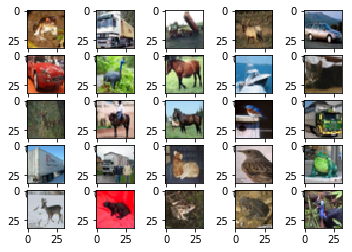

In [11]:
show_images()

In [22]:
model = Sequential()
model.add(Conv2D(32, kernel_size=7, activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(strides=2))
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        4736      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               540900    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1010      
Total params: 546,646
Trainable params: 546,646
Non-trainable params: 0
_________________________________________________________________


In [23]:
history = model.fit(x_train, y_train, validation_split=0.25, batch_size=32, epochs=10)

Train on 37500 samples, validate on 12500 samples
Epoch 1/10
37500/37500 [==============================] - 47s 1ms/step - loss: 1.6199 - acc: 0.4215 - val_loss: 1.4336 - val_acc: 0.4966
Epoch 2/10
37500/37500 [==============================] - 45s 1ms/step - loss: 1.2958 - acc: 0.5498 - val_loss: 1.2224 - val_acc: 0.5780
Epoch 3/10
37500/37500 [==============================] - 45s 1ms/step - loss: 1.1511 - acc: 0.6045 - val_loss: 1.1956 - val_acc: 0.5960
Epoch 4/10
37500/37500 [==============================] - 45s 1ms/step - loss: 1.0556 - acc: 0.6355 - val_loss: 1.1818 - val_acc: 0.6037
Epoch 5/10
37500/37500 [==============================] - 45s 1ms/step - loss: 0.9789 - acc: 0.6635 - val_loss: 1.2992 - val_acc: 0.5895
Epoch 6/10
37500/37500 [==============================] - 45s 1ms/step - loss: 0.9132 - acc: 0.6884 - val_loss: 1.2554 - val_acc: 0.5930
Epoch 7/10
37500/37500 [==============================] - 45s 1ms/step - loss: 0.8450 - acc: 0.7118 - val_loss: 1.1961 - val_acc

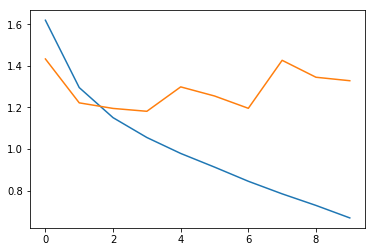

In [25]:
# plt.subplot(121)
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.subplot(122)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.show()